In [50]:
import logging
logging.basicConfig(level=logging.INFO, 
                    format="%(asctime)s - %(levelname)s : %(message)s")
import os
import numpy as np
import cv2

In [2]:
image_path = "../images/lena.jpg"
assert os.path.exists(image_path), \
  "The image file at {} was not found.".format(image_path)

In [21]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = np.float32(image)
image

array([[164., 160., 159., ..., 163., 186., 150.],
       [165., 161., 161., ..., 176., 208., 152.],
       [161., 158., 157., ..., 127., 102.,  64.],
       ...,
       [ 48.,  55.,  51., ...,  61.,  79.,  94.],
       [ 47.,  53.,  51., ...,  80.,  97., 105.],
       [ 44.,  50.,  51., ...,  97., 108., 106.]], dtype=float32)

In [37]:
img_dft = cv2.dft(image, flags=cv2.DFT_COMPLEX_OUTPUT)
img_dft.shape

(200, 200, 2)

In [42]:
img_idft = cv2.idft(img_dft)
img_idft.shape

(200, 200, 2)

In [80]:
img_idft_magn = cv2.magnitude(img_idft[:,:,0], img_idft[:,:,1])
kernel = image.shape[0] * image.shape[1]

img_idft_magn /= kernel
img_idft_magn.shape, img_idft_magn

((200, 200),
 array([[164.      , 159.99998 , 158.99998 , ..., 162.99998 , 186.00002 ,
         149.99998 ],
        [164.99998 , 161.      , 161.      , ..., 176.00003 , 208.      ,
         152.      ],
        [161.      , 158.      , 156.99998 , ..., 127.      , 101.99999 ,
          63.999992],
        ...,
        [ 48.00002 ,  54.99999 ,  51.000004, ...,  61.00001 ,  78.99999 ,
          93.99999 ],
        [ 47.      ,  52.999992,  50.999992, ...,  79.99999 ,  97.      ,
         105.      ],
        [ 44.00001 ,  50.000008,  51.00001 , ...,  97.      , 108.      ,
         105.999985]], dtype=float32))

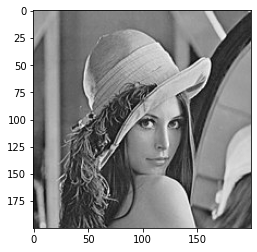

In [81]:
plt.imshow(img_idft_magn, cmap="gray")
plt.show()

In [82]:
cv2.imwrite("./img_idft.png", img_idft_magn)

True

In [84]:
!python3 ./image_dft.py